In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/property-dataset/Dataset property.csv
/kaggle/input/property-dataset/data Emitten Property Febyola.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/property-dataset/Dataset property.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  20 non-null     object 
 1   DER                      20 non-null     float64
 2   Operating Profit Margin  20 non-null     float64
 3   ROA                      20 non-null     float64
 4   Sales Growth             20 non-null     float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,20.000000,20.000000,20.000000,20.000000,0.0
mean,0.086500,5.504421,0.009500,-2.470423,NaN
std,3.345791,5.914422,0.043222,8.480276,NaN
min,-13.780000,-0.025778,-0.060000,-18.231694,NaN
25%,0.212500,0.188384,-0.012500,-7.522221,NaN
50%,0.540000,1.982973,0.000000,-1.706950,NaN
75%,1.145000,10.938139,0.032500,4.489220,NaN
max,3.100000,15.019076,0.130000,10.221301,NaN


In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

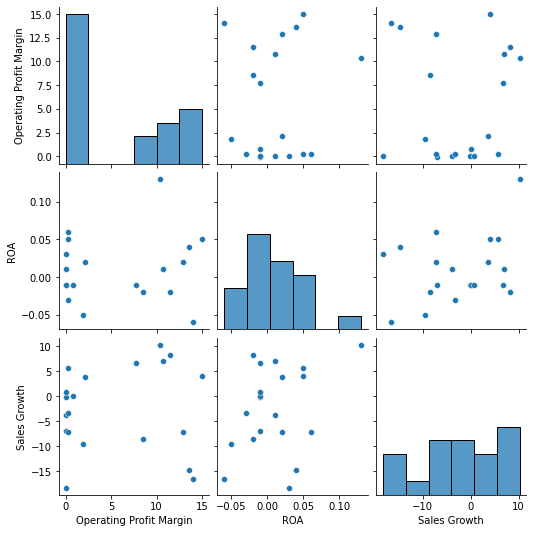

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/property-dataset/Dataset property.csv')
df1 = df0[['DER','Operating Profit Margin' ,'ROA','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,20.000000,20.000000,20.000000,20.000000,0.0
mean,0.086500,5.504421,0.009500,-2.470423,NaN
std,3.345791,5.914422,0.043222,8.480276,NaN
min,-13.780000,-0.025778,-0.060000,-18.231694,NaN
25%,0.212500,0.188384,-0.012500,-7.522221,NaN
50%,0.540000,1.982973,0.000000,-1.706950,NaN
75%,1.145000,10.938139,0.032500,4.489220,NaN
max,3.100000,15.019076,0.130000,10.221301,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

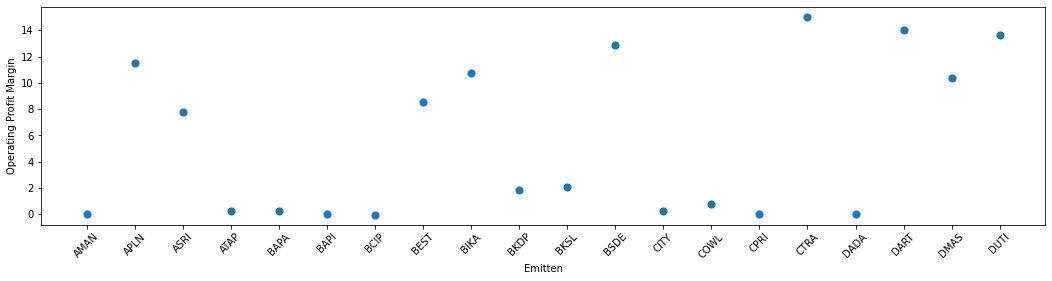

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

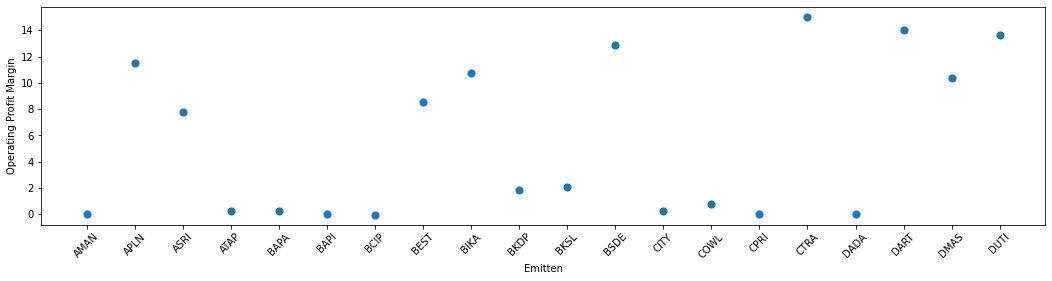

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

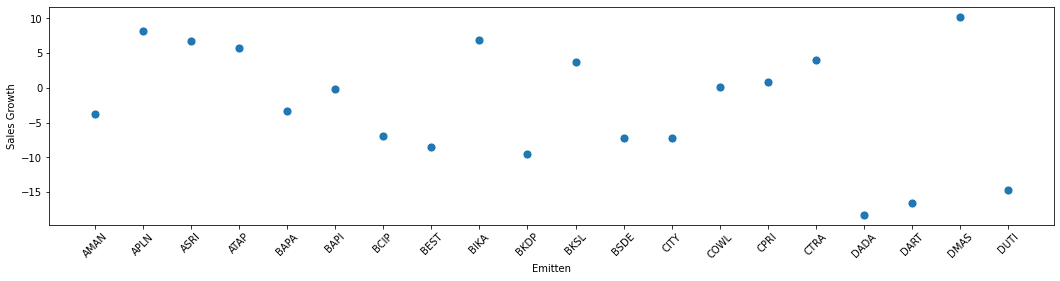

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 20
Jumlah baris setelah memfilter outlier: 20


In [12]:
df1.describe()

,DER,Operating Profit Margin,ROA,Sales Growth,Category
count,20.000000,20.000000,20.000000,20.000000,0.0
mean,0.086500,5.504421,0.009500,-2.470423,NaN
std,3.345791,5.914422,0.043222,8.480276,NaN
min,-13.780000,-0.025778,-0.060000,-18.231694,NaN
25%,0.212500,0.188384,-0.012500,-7.522221,NaN
50%,0.540000,1.982973,0.000000,-1.706950,NaN
75%,1.145000,10.938139,0.032500,4.489220,NaN
max,3.100000,15.019076,0.130000,10.221301,NaN


In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,6.938894e-18,1.110223e-16,7.771561e-17
std,1.025978e+00,1.025978e+00,1.025978e+00
min,-4.252127e+00,-9.593269e-01,-1.906863e+00
25%,3.863758e-02,-9.221760e-01,-6.111871e-01
50%,1.390646e-01,-6.108677e-01,9.236812e-02
75%,3.245863e-01,9.425903e-01,8.420060e-01
max,9.240821e-01,1.650513e+00,1.535497e+00


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(20, 6)

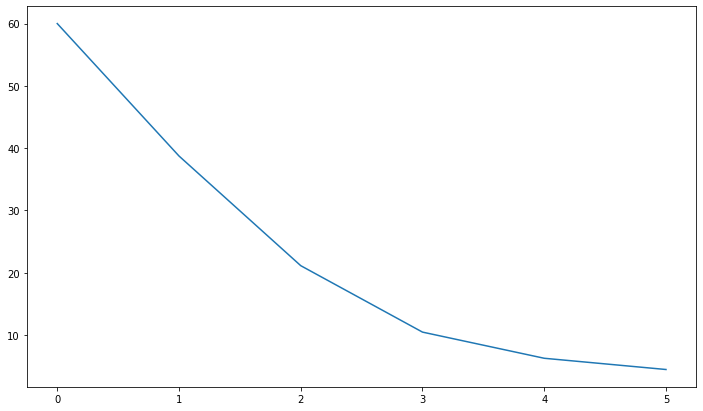

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 7))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

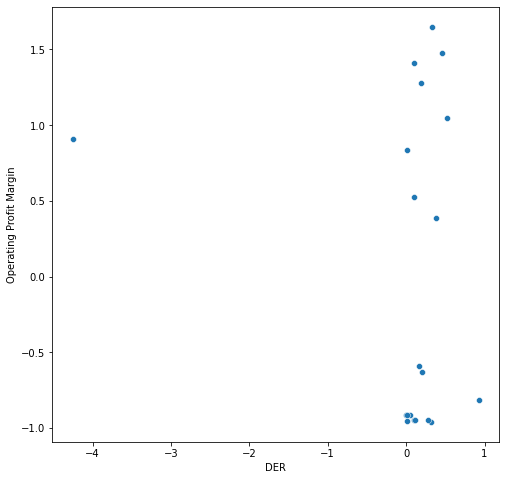

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
 new_df.head(20)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.096134,-0.946609,-0.160547,NaN,0
1,0.522374,1.046330,1.289051,NaN,0
2,0.387449,0.390790,1.108545,NaN,0
3,0.047070,-0.914342,0.988261,NaN,0
4,-0.005060,-0.913650,-0.102504,NaN,0
5,0.117599,-0.946424,0.287241,NaN,0
6,0.323053,-0.959327,-0.539473,NaN,0
7,0.102267,0.523735,-0.723204,NaN,0
8,-4.252127,0.908010,1.142541,NaN,1
9,0.197328,-0.632036,-0.850293,NaN,0


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(20)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,0.096134,-0.946609,-0.160547,NaN,0
1,2,0.522374,1.046330,1.289051,NaN,0
2,2,0.387449,0.390790,1.108545,NaN,0
3,2,0.047070,-0.914342,0.988261,NaN,0
4,2,-0.005060,-0.913650,-0.102504,NaN,0
5,2,0.117599,-0.946424,0.287241,NaN,0
6,2,0.323053,-0.959327,-0.539473,NaN,0
7,2,0.102267,0.523735,-0.723204,NaN,0
8,4,-4.252127,0.908010,1.142541,NaN,1
9,2,0.197328,-0.632036,-0.850293,NaN,0


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       20 non-null     int64  
 1   DER (St.)                      20 non-null     float64
 2   Operating Profit Margin (St.)  20 non-null     float64
 3   Sales Growth (St.)             20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


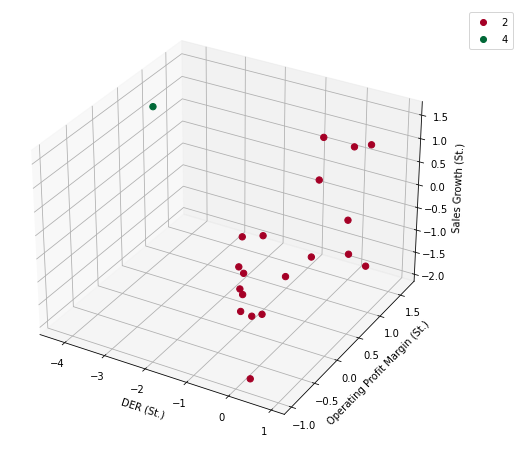

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

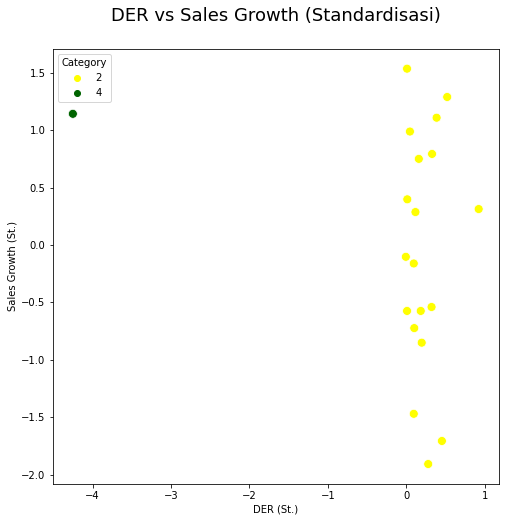

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

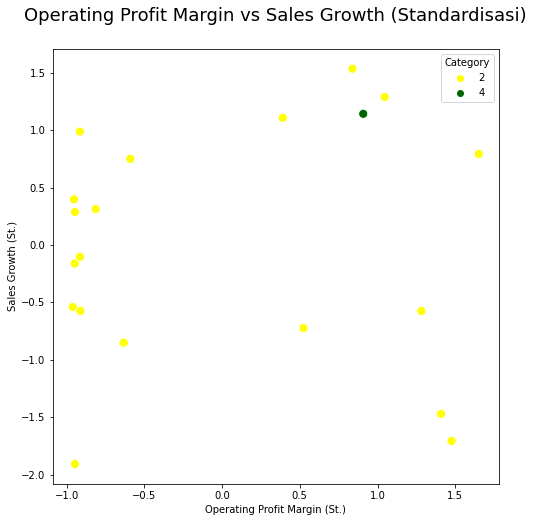

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

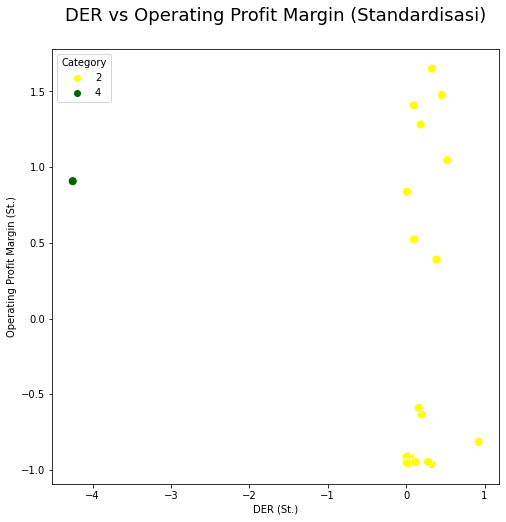

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/property-dataset/data Emitten Property Febyola.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(20)

,Emitten;Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,ROA,Sales Growth
0,AMAN;Makmur Berkah Amanda Tbk,2,0.096134,-0.946609,-0.160547,AMAN,0.40,0.047536,0.01,-3.797435
1,APLN;Agung Podomoro Land Tbk,2,0.522374,1.046330,1.289051,APLN,1.79,11.536165,-0.02,8.184296
2,ASRI;Alam Sutera Realty Tbk,2,0.387449,0.390790,1.108545,ASRI,1.35,7.757196,-0.01,6.692310
3,ATAP;Trimitra Prawara Goldland Tbk,2,0.047070,-0.914342,0.988261,ATAP,0.24,0.233544,0.05,5.698101
4,BAPA;Bekasi Asri Pemula Tbk,2,-0.005060,-0.913650,-0.102504,BAPA,0.07,0.237532,-0.03,-3.317679
5,BAPI;Bhakti Agung Propertindo Tbk,2,0.117599,-0.946424,0.287241,BAPI,0.47,0.048601,-0.01,-0.096221
6,BCIP;Bumi Citra Permai Tbk,2,0.323053,-0.959327,-0.539473,BCIP,1.14,-0.025778,-0.01,-6.929469
7,BEST;Bekasi Fajar Industrial Estate Tbk,2,0.102267,0.523735,-0.723204,BEST,0.42,8.523578,-0.02,-8.448099
8,BIKA;Binakarya Jaya Abadi Tbk,4,-4.252127,0.908010,1.142541,BIKA,-13.78,10.738797,0.01,6.973307
9,BKDP;Bukit Darmo Property Tbk,2,0.197328,-0.632036,-0.850293,BKDP,0.73,1.860947,-0.05,-9.498563


In [29]:
df.to_csv('result.csv', index = False)

In [30]:
kmeans.cluster_centers_

array([[ 0.22379615, -0.04779002, -0.06013373],
       [-4.25212693,  0.90801036,  1.14254095]])

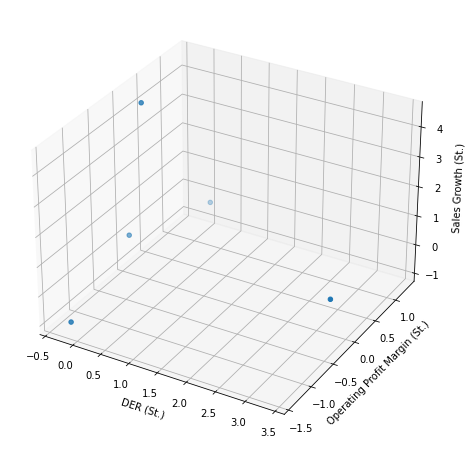

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

In [32]:
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,1.0,1.000000,1.00000,1.000000,1.00,1.000000,1.00,1.000000
mean,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307
25%,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307
50%,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307
75%,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307
max,4.0,-4.252127,0.90801,1.142541,-13.78,10.738797,0.01,6.973307


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.0,0.223796,-0.047790,-0.060134,0.816316,5.228927,0.009474,-2.967462
std,0.0,0.231877,1.030968,1.017237,0.756169,5.943188,0.044406,8.408027
min,2.0,-0.005060,-0.959327,-1.906863,0.070000,-0.025778,-0.060000,-18.231694
25%,2.0,0.071602,-0.930010,-0.648526,0.320000,0.143224,-0.015000,-7.830847
50%,2.0,0.160530,-0.632036,-0.102504,0.610000,1.860947,-0.010000,-3.317679
75%,2.0,0.326120,0.942221,0.771733,1.150000,10.936013,0.035000,3.908374
max,2.0,0.924082,1.650513,1.535497,3.100000,15.019076,0.130000,10.221301


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,ROA,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
